<a href="https://colab.research.google.com/github/JManuelRG/cursopython/blob/main/2/Uso%20del%20lenguaje/Enfriamiento%20de%20una%20%20l%C3%A1mina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

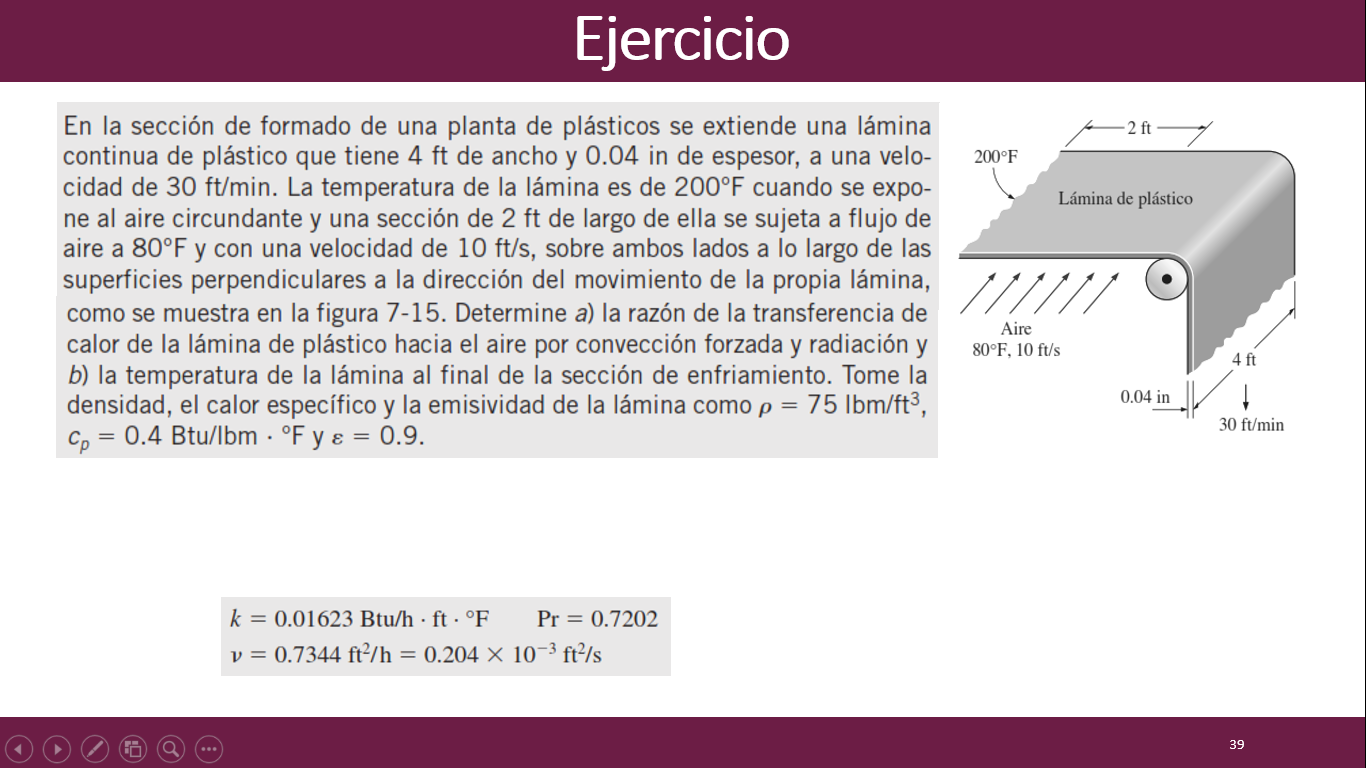

# Solución.

## Definir los datos:



In [75]:
# Variables
# Datos Físicos
k = 0.01623 # BTU/hft°F
Pr = 0.7202
v = 0.204e-3 # ft2/s
Cp = 0.4 # BTU/lbm°F
e = 0.9

In [76]:
# Dimensiones de la placa
ancho = 4 #ft
espesor = 0.04 #in
velocidad = 30 #ft/min
largo = 2 #ft
Tlamina = 200 #°F
Taire = 80 #F
vaire = 10 #ft/s
densidad = 75 #lbm/ft3

# Solución
## Régimen de flujo:

$$Re = VL/\nu $$


In [77]:
Re = vaire*ancho/v

print(Re)

if Re<5e5:
  print("El régimen es laminar para este flujo")
else:
  print("El régimen es turbulento para este flujo")

196078.43137254904
El régimen es laminar para este flujo


# Cálculo del número de Nusselt.

## Laminar:
$$Nu = 0.664Re^{0.5}_LPr^{1/3}$$

## Turbulento:
$$Nu = 0.037Re^{0.8}_LPr^{1/3}$$

In [78]:
# Número de Nusselt Régimen Laminar

if Re<5e5:
  Nu = 0.664*Re**0.5*Pr**(1/3)

if Re>5e5 and Re<1e7:
  Nu = 0.037*Re**0.8*Pr**(1/3)
  print("Flujo tubulento")

print(Nu)

263.55263561533684


Cálculo del coeficiente convectivo de transferencia de calor:
$$h = \frac{Nuk}{L}$$

In [79]:
h = Nu*k/ancho # BTU/h °F
print(h) 

1.0693648190092293


# Transferencia de Calor por Convección

## Ley de Enfriamiento de Newton

$$Q_conv=A_sh(T_s-T{_\infty})$$

In [80]:
# Área 
As = ancho*largo*2
print(As) #m2

Qconv = As*h*(Tlamina-Taire)
print(Qconv)

16
2053.18045249772


# Transferencia de calor por radiación

$$Q_{rad}=\epsilon\sigma A_s (T_s^4-T_\infty^4)$$

In [81]:
s = 0.1714e-8

Qrad = e*s*As*((Tlamina+459.67)**4-(Taire+459.67)**4)

print(Qrad)

2580.344087625336


# a) Cálculo de la transferencia de Calor total

$$Q_{total}= Q_{conv}+Q_{rad}$$

In [82]:
Qtotal = Qconv+Qrad
print(Qtotal)

4633.524540123057


# b) Cálculo de la temperatura final del plástico

$$\dot{m}=\rho A_c v_{plástico} $$

In [83]:
m = densidad*(espesor/12)*ancho*(velocidad/60) # lbm/s
print(m)

0.5


# Temperatura Final

## Balance de energía:
$$Q_{total}=\dot{m}C_P(T_2-T_1)$$

#### Despejando 
$$T_2 = T_1 + \frac{Q_{total}}{\dot{m}C_P}$$

In [84]:
T2 = Tlamina + (-Qtotal/(m*Cp)/3600)
print(T2) #F

193.5645492498291
